# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# !pip3 install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_list = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []


city_count = 0
city_set = 1


for city in cities:
    try:
        response = requests.get('http://api.openweathermap.org/data/2.5/weather?q='+city+'&appid=9efd0c479c718c66e129d30ac7053e00').json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if city_count >= 49:
            city_count = 1
            city_set += 1
            city_list.append(city)
        else:
            city_count += 1
            city_list.append(city)
        print(f"Processing Record {city_count} of Set {city_set} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------\nData Retrieval Complete\n------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | tual
Processing Record 4 of Set 1 | punta cardon
Processing Record 5 of Set 1 | bonavista
Processing Record 6 of Set 1 | dzhuryn
Processing Record 7 of Set 1 | sao joao da barra
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | gaziantep
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | tiznit
Processing Record 12 of Set 1 | ivanteyevka
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | deputatskiy
Processing Record 16 of Set 1 | nago
Processing Record 17 of Set 1 | hambantota
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | aklavik
Processing Record 22 of Set 1 | port hardy
City not 

City not found. Skipping...
Processing Record 43 of Set 4 | alihe
Processing Record 44 of Set 4 | chapais
Processing Record 45 of Set 4 | hirara
Processing Record 46 of Set 4 | porto novo
City not found. Skipping...
Processing Record 47 of Set 4 | shakawe
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | los llanos de aridane
Processing Record 1 of Set 5 | la ronge
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | laguna
Processing Record 4 of Set 5 | bara
Processing Record 5 of Set 5 | gondanglegi
Processing Record 6 of Set 5 | sosnovo-ozerskoye
Processing Record 7 of Set 5 | broome
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 5 | krasnoselkup
Processing Record 9 of Set 5 | rubbestadneset
Processing Record 10 of Set 5 | juneau
Processing Record 11 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 12 of Set 5 | phayao
Processing Record 13 of Set 5 | qaanaaq
Processing Record 14 of Set 5 | nizhneudinsk
P

Processing Record 39 of Set 8 | kabalo
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | verkhoyansk
Processing Record 42 of Set 8 | seymchan
City not found. Skipping...
Processing Record 43 of Set 8 | khani
City not found. Skipping...
Processing Record 44 of Set 8 | darlington
Processing Record 45 of Set 8 | spring valley
Processing Record 46 of Set 8 | meulaboh
Processing Record 47 of Set 8 | eldorado
Processing Record 48 of Set 8 | nedryhayliv
Processing Record 49 of Set 8 | bangkalan
City not found. Skipping...
Processing Record 1 of Set 9 | puerto escondido
Processing Record 2 of Set 9 | bintulu
Processing Record 3 of Set 9 | osa
City not found. Skipping...
Processing Record 4 of Set 9 | cajabamba
Processing Record 5 of Set 9 | mandera
Processing Record 6 of Set 9 | tungor
Processing Record 7 of Set 9 | acapulco
Processing Record 8 of Set 9 | uddevalla
Processing Record 9 of Set 9 | port lincoln
Processing Record 10 of Set 9 | antequera
Processing Record 11 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
output_data_file = 'cities.csv'
weather_dict = {
    "City":city_list,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_df = pd.DataFrame(weather_dict)
weather_df.round(decimals=2)
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chuy,16,UY,1611433610,65,-33.6971,-53.4616,300.03,5.78
1,new norfolk,1,AU,1611433313,75,-42.7826,147.0587,287.59,1.10
2,tual,100,ID,1611433610,76,-5.6667,132.7500,301.83,5.33
3,punta cardon,95,VE,1611433610,69,11.6581,-70.2150,300.64,11.83
4,bonavista,92,CA,1611433610,93,48.6499,-53.1147,269.82,3.60


In [6]:
weather_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [7]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,561.000000,5.610000e+02,561.000000,561.000000,561.000000,561.000000,561.000000
mean,59.247772,1.611434e+09,72.058824,20.202183,20.290713,282.514848,3.541872
std,40.397546,1.094219e+02,21.187136,33.707143,90.124475,19.029073,2.612323
min,0.000000,1.611433e+09,11.000000,-54.800000,-179.166700,224.790000,0.110000
25%,16.000000,1.611434e+09,63.000000,-7.747900,-59.516700,271.150000,1.760000
50%,75.000000,1.611434e+09,78.000000,24.144700,24.666700,288.150000,2.950000
75%,100.000000,1.611434e+09,88.000000,47.804300,102.279700,298.150000,4.630000
max,100.000000,1.611434e+09,100.000000,78.218600,179.316700,313.150000,14.800000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df[weather_df['Humidity']>100].count()[0]

0

In [ ]:
#  Get the indices of cities that have humidity over 100%.
# Skipping this step as the count came as 0

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Skipping this step as the count came as 0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

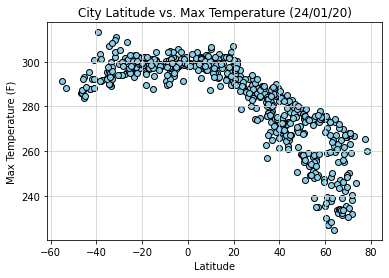

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (24/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

## Latitude vs. Humidity Plot

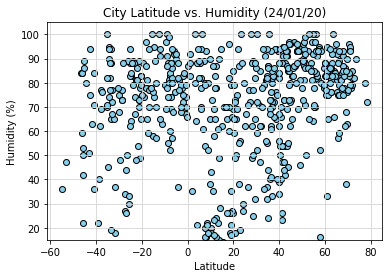

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (24/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

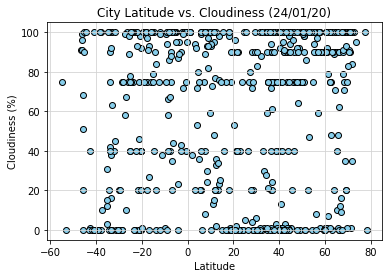

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (24/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

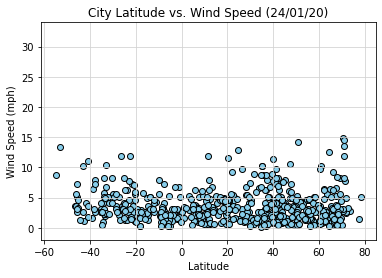

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (24/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [13]:
north_hem_data = weather_df[weather_df['Lat']>0]
south_hem_data = weather_df[weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.854612


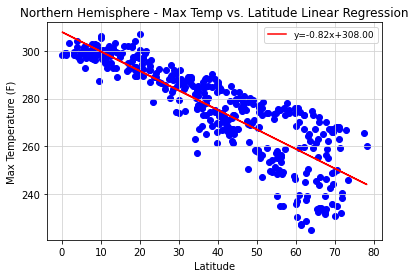

In [25]:
res = linregress(north_hem_data["Lat"],north_hem_data["Max Temp"])

print(f"The r-value is: {res.rvalue:.6f}")

plt.scatter(north_hem_data["Lat"],north_hem_data["Max Temp"],facecolors="blue")
plt.plot(north_hem_data["Lat"], res.intercept + res.slope*north_hem_data["Lat"], 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(fontsize=9)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.428060


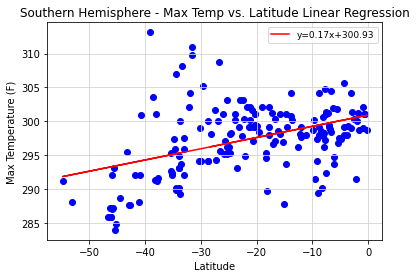

In [26]:
res = linregress(south_hem_data["Lat"],south_hem_data["Max Temp"])
print(f"The r-value is: {res.rvalue:.6f}")
plt.scatter(south_hem_data["Lat"],south_hem_data["Max Temp"],facecolors="blue")
plt.plot(south_hem_data["Lat"], res.intercept + res.slope*south_hem_data["Lat"], 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(fontsize=9)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.385301


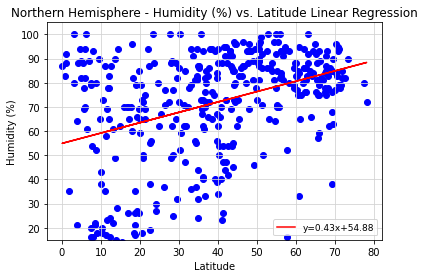

In [27]:
res = linregress(north_hem_data["Lat"],north_hem_data["Humidity"])
print(f"The r-value is: {res.rvalue:.6f}")
plt.scatter(north_hem_data["Lat"],north_hem_data["Humidity"],facecolors="blue")
plt.plot(north_hem_data["Lat"], res.intercept + res.slope*north_hem_data["Lat"], 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(fontsize=9)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.286144


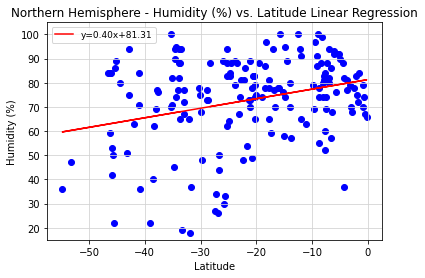

In [28]:
res = linregress(south_hem_data["Lat"],south_hem_data["Humidity"])
print(f"The r-value is: {res.rvalue:.6f}")
plt.scatter(south_hem_data["Lat"],south_hem_data["Humidity"],facecolors="blue")
plt.plot(south_hem_data["Lat"], res.intercept + res.slope*south_hem_data["Lat"], 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(fontsize=9)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.138329


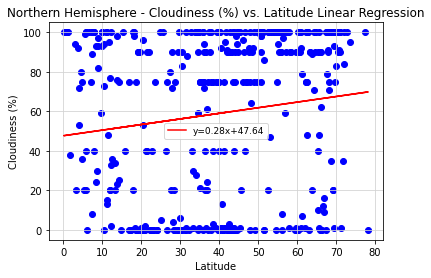

In [29]:
res = linregress(north_hem_data["Lat"],north_hem_data["Cloudiness"])
print(f"The r-value is: {res.rvalue:.6f}")
plt.scatter(north_hem_data["Lat"],north_hem_data["Cloudiness"],facecolors="blue")
plt.plot(north_hem_data["Lat"], res.intercept + res.slope*north_hem_data["Lat"], 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(fontsize=9)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.287213


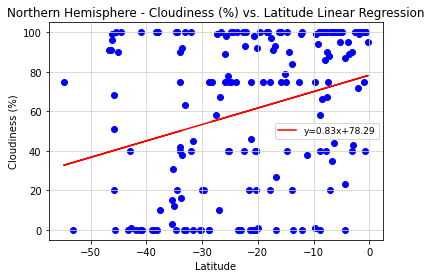

In [30]:
res = linregress(south_hem_data["Lat"],south_hem_data["Cloudiness"])
print(f"The r-value is: {res.rvalue:.6f}")
plt.scatter(south_hem_data["Lat"],south_hem_data["Cloudiness"],facecolors="blue")
plt.plot(south_hem_data["Lat"], res.intercept + res.slope*south_hem_data["Lat"], 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(fontsize=9)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.066462


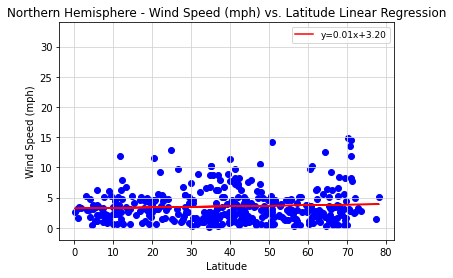

In [31]:
res = linregress(north_hem_data["Lat"],north_hem_data["Wind Speed"])
print(f"The r-value is: {res.rvalue:.6f}")

plt.scatter(north_hem_data["Lat"],north_hem_data["Wind Speed"],facecolors="blue")
plt.plot(north_hem_data["Lat"], res.intercept + res.slope*north_hem_data["Lat"], 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(fontsize=9)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.358736


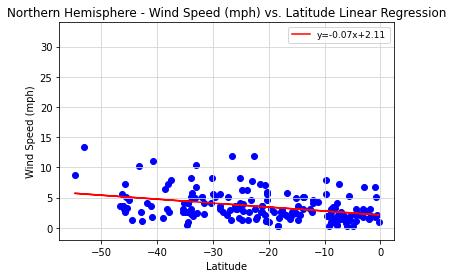

In [32]:
res = linregress(south_hem_data["Lat"],south_hem_data["Wind Speed"])
print(f"The r-value is: {res.rvalue:.6f}")

plt.scatter(south_hem_data["Lat"],south_hem_data["Wind Speed"],facecolors="blue")
plt.plot(south_hem_data["Lat"], res.intercept + res.slope*south_hem_data["Lat"], 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(fontsize=9)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()